<a id="1"></a>
<h1 style="background-color:lightgreen;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Importing Essential Libraries and Tools</h1>

 * [1.Importing Essential Libraries and Tools](#1)
    
* [2. Loading The Data](#2)
  
* [3. Plotting a few Example Images](#3)

* [4.Data Scaling](#4)


* [5. Data Augmentation](#6)

* [6. Building Deep Learning Model](#7)

* [7. Results](#8)
* [8. Manual Testing](#9)




![](https://plus.unsplash.com/premium_photo-1661690000205-dc0528379894?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
import warnings
warnings.filterwarnings("ignore")
tf.keras.backend.clear_session()

<a id="2"></a>
# <p style="padding:10px;background-color:tomato;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Loading the Data</p>

> <div class="alert alert-block alert-info">
<b>Tip:</b> We load the data by making use of the tool image_dataset_from directory. It helps us fetch the data from the relevant directory, automatically does labeling, shuffles the data, batches the data (in this case as 32) and resizes images into 256 by 256.</div>

In [2]:
test_data = keras.utils.image_dataset_from_directory("test")
train_data =  keras.utils.image_dataset_from_directory("train")

Found 660 files belonging to 2 classes.
Found 2637 files belonging to 2 classes.


<a id="3"></a>
# <p style="padding:10px;background-color:tomato;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Plotting a few Example Images</p>

> <div class="alert alert-block alert-info">
<b>Tip:</b> If a skin cancer is malignant it is labeled as 1, if no it is labeled as 0.</div>

In [3]:
batch = train_data.as_numpy_iterator().next()

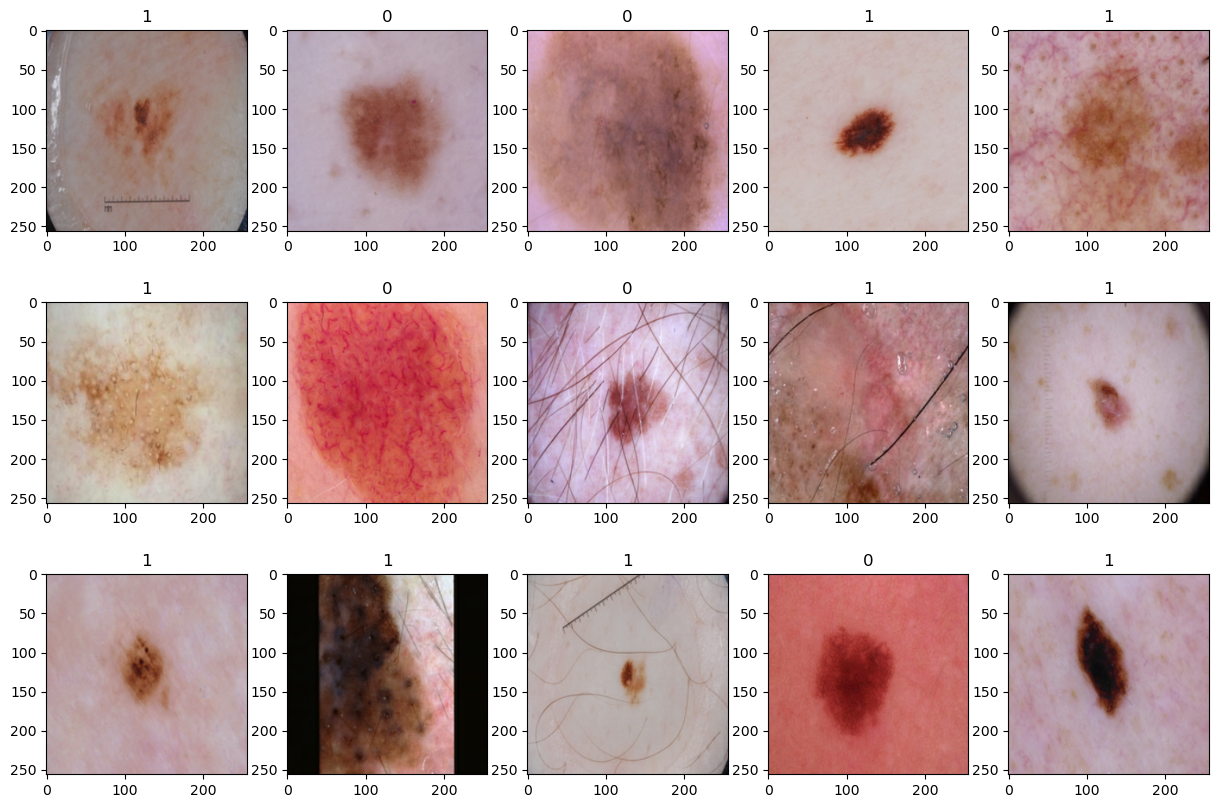

In [4]:
fig, ax = plt.subplots(3, 5, figsize=(15,10))
ax = ax.flatten()
for idx, img in enumerate(batch[0][:15]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

<a id="4"></a>
# <p style="padding:10px;background-color:tomato;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Scaling</p>

> <div class="alert alert-block alert-info">
<b>Tip:</b> Since our data consists of images and images consist of pixels, we divide all the pixel values by 255—each pixel can have a value in [0, 255]— so that all the pixel values are on the same scale i.e. [0, 1]..</div>

In [5]:
train_data = train_data.map(lambda x,y: (x/255, y))
test_data = test_data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [6]:
batch = train_data.as_numpy_iterator().next()

In [7]:
print("Minimum value of the scaled data:", batch[0].min())
print("Maximum value of the scaled data:", batch[0].max())

Minimum value of the scaled data: 0.0
Maximum value of the scaled data: 1.0


<a id="6"></a>
# <p style="padding:10px;background-color:tomato;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">  Data Augmentation</p>

> <div class="alert alert-block alert-info">
<b>Tip:</b> Because our Train set has relatively small number of images, we can apply data augmentation which is reproducing the images by applying some changes such as random rotating, random flipping, random zoom and random contrast. This may possibly increase the accuracy score of the model. Since we will be applying the data augmentation in the beginning of the neural network architecture, we should pass the input shape.</div>
<div class="alert alert-block alert-warning">
<b>Note:</b>Data augmentation will be inactive when testing the data. Input images will be augmented during calls to model.fit (not model.evaluate or model.predict). If you want to learn more about data augmentation in Tensorflow, you can check the official documentation.
</div>


In [8]:
batch = train_data.as_numpy_iterator().next()

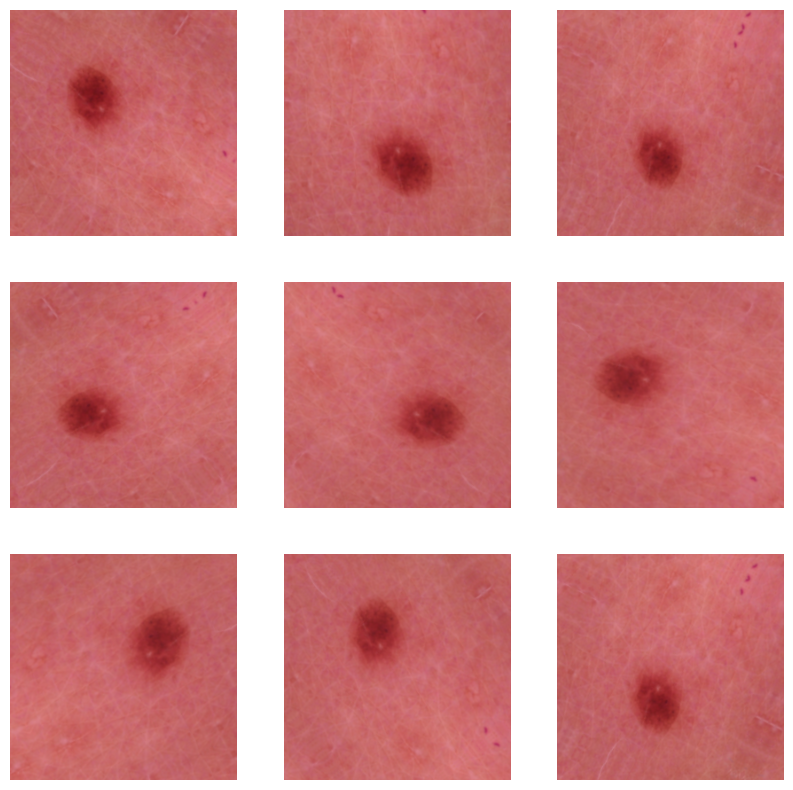

In [9]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(256,256,3)),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.RandomRotation(0.2)
])

image = batch[0]


plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

<a id="7"></a>
# <p style="padding:10px;background-color:tomato;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">  Building Deep Learning Model</p>

In [10]:
model = Sequential([
    data_augmentation,
    Conv2D(16, (3,3), 1, activation="relu", padding="same"),
    Conv2D(16, (3,3), 1, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(32, (5,5), 1, activation="relu", padding="same"),
    Conv2D(32, (5,5), 1, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation="relu", padding="same"),
    Conv2D(16, (3,3), 1, activation="relu", padding="same"),
    MaxPooling2D(),
    
    Flatten(),
    Dense(128, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [11]:
model.compile(loss='binary_crossentropy', # binary kullanilir 2 sinifta
             optimizer='adam', 
             metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "acc"])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      12832     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      25632     
                                                      

In [13]:
history = model.fit(train_data, epochs=100, validation_data=test_data)

Epoch 1/100
10/83 [==>...........................] - ETA: 7:39 - loss: 0.7081 - precision: 0.4382 - recall: 0.8069 - acc: 0.4437

KeyboardInterrupt: 

<a id="8"></a>
# <p style="padding:10px;background-color:tomato;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Results</p>

In [14]:
bin_acc = BinaryAccuracy()
recall = Recall()
precision = Precision()

for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    bin_acc.update_state(y, yhat)
    recall.update_state(y, yhat)
    precision.update_state(y, yhat)

print("Accuracy:", bin_acc.result().numpy(), "\nRecall:", recall.result().numpy(), "\nPrecision:", precision.result().numpy())

Accuracy: 0.8583333 
Recall: 0.93 
Precision: 0.7926136


<a id="9"></a>
# <p style="padding:10px;background-color:tomato;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Manual Testing</p>

> <div class="alert alert-block alert-info">
<b>Tip:</b>We have already evaluated our model using various metrics and visualizations but it is always a good practice to test the model by hand to make sure everything is working well. In the code below, I randomly chose an image and plotted it with its true label on title so let's see if our model is going to classify this example correctly.</div>

In [15]:
batch = test_data.as_numpy_iterator().next()

In [16]:
batch[0][15]

array([[[0.69411767, 0.56078434, 0.6666667 ],
        [0.69730395, 0.56715685, 0.67941177],
        [0.69264704, 0.55245095, 0.67965686],
        ...,
        [0.72156864, 0.6017157 , 0.7230392 ],
        [0.7223039 , 0.5926471 , 0.7205882 ],
        [0.7254902 , 0.6117647 , 0.73333335]],

       [[0.69730395, 0.5767157 , 0.67941177],
        [0.69790137, 0.5753217 , 0.6947457 ],
        [0.69264704, 0.56977636, 0.686826  ],
        ...,
        [0.72256434, 0.6027114 , 0.7240349 ],
        [0.7236979 , 0.59583336, 0.72257966],
        [0.71911764, 0.61495095, 0.73014706]],

       [[0.69803923, 0.57230395, 0.6877451 ],
        [0.69584864, 0.5669271 , 0.69710475],
        [0.69921875, 0.57225794, 0.691345  ],
        ...,
        [0.7136949 , 0.5997396 , 0.72123164],
        [0.72166055, 0.608027  , 0.7296109 ],
        [0.72843134, 0.61838233, 0.7294118 ]],

       ...,

       [[0.59583336, 0.47867647, 0.57916665],
        [0.63048404, 0.5081495 , 0.6016697 ],
        [0.6598805 , 0

In [17]:
batch[1][15]

0

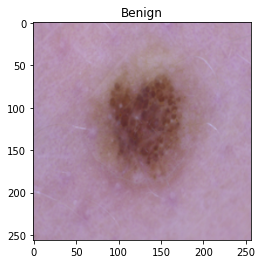

In [18]:
img, label = batch[0][15], batch[1][15]
plt.imshow(img)
if label==1:
    plt.title("Malignant")
else:
    plt.title("Benign")
plt.show()

In [19]:
y_hat = model.predict(np.expand_dims(img, 0))

> <div class="alert alert-block alert-warning">
<b>Example:</b> We are able to see the probability of this skin  malignant below. I opted to determine the classification threshold as 0.5. Meaning that, if it is below 0.5 this will be classified as benign otherwise it is going to be classified as malignant.
</div>

In [20]:
y_hat

array([[0.16851258]], dtype=float32)

In [21]:
if y_hat < 0.5:
    print("Benign")
else:
    print("Malignant")

Benign
